# Homework 1
# Abayomi Koyejo
## Petroleum Engineering

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

### 1. Load test and train data using pandas

In [204]:
test = pd.read_csv("hw1_test.csv")
train = pd.read_csv("hw1_train.csv")

In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Columns: 501 entries, Target to Time-499
dtypes: float64(500), int64(1)
memory usage: 5.0 MB


In [206]:
train.head(10)

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-1,-0.140400,0.17164,0.302040,0.23280,0.033853,-0.22418,-0.46999,-0.645400,-0.617700,...,-0.31997,0.390900,0.97483,1.258700,1.14330,0.647090,-0.049582,-0.690400,-0.97660,-0.79426
1,-1,0.334040,0.32225,0.453840,0.67185,0.887900,1.02050,1.05980,1.030300,0.950750,...,0.43519,-0.346500,-0.92491,-1.208700,-1.24800,-1.140000,-1.041800,-1.041800,-1.15960,-1.37570
2,-1,0.716690,0.74437,0.725910,0.66133,0.555220,0.41359,0.24658,0.065273,-0.121110,...,3.17100,2.276000,1.21950,0.081881,-1.05030,-2.092900,-2.983300,-3.675300,-4.13660,-4.33960
3,1,1.240300,1.33120,1.386600,1.38320,1.306000,1.14280,0.87861,0.532290,0.140020,...,-0.82026,-1.124600,-1.30200,-1.340600,-1.27140,-1.146400,-1.011300,-0.931220,-0.93450,-1.00130
4,-1,-1.159500,-1.20420,-1.167600,-1.03350,-0.818170,-0.55812,-0.29929,-0.093691,0.022770,...,0.66085,0.441440,0.20618,-0.006941,-0.14692,-0.183080,-0.112380,0.008987,0.13141,0.18627
5,1,0.659020,0.32579,0.019658,-0.22144,-0.393310,-0.51609,-0.60286,-0.661320,-0.706270,...,0.24442,0.045383,-0.16730,-0.382870,-0.59915,-0.786110,-0.913570,-0.932320,-0.81169,-0.55159
6,-1,-0.357040,-0.34950,-0.478710,-0.67790,-0.884630,-1.00200,-0.98154,-0.741430,-0.256900,...,0.25993,0.418210,0.40421,0.305150,0.15980,0.082486,0.122110,0.219020,0.26962,0.19748
7,-1,0.012008,0.75968,1.301100,1.56440,1.511800,1.21680,0.75547,0.345710,0.032022,...,-0.73609,-0.503290,-0.33897,-0.278930,-0.23153,-0.059515,0.343610,0.954550,1.64870,2.14380
8,1,-1.064300,-1.10270,-1.095800,-1.05370,-0.961710,-0.80527,-0.55537,-0.203580,0.204560,...,-0.87814,-1.131700,-1.25970,-1.253400,-1.11580,-0.870280,-0.558200,-0.232370,0.06438,0.31117
9,1,-1.196700,-0.93059,-0.608550,-0.23722,0.177140,0.61496,1.04970,1.444200,1.761800,...,-0.11264,0.162020,0.42344,0.656310,0.85193,1.011200,1.128800,1.190100,1.17520,1.06690



### 2. Plot and Analyze training data 


([<matplotlib.axis.YTick at 0x7fb3f80835c0>,
 <a list of 6 Text yticklabel objects>)

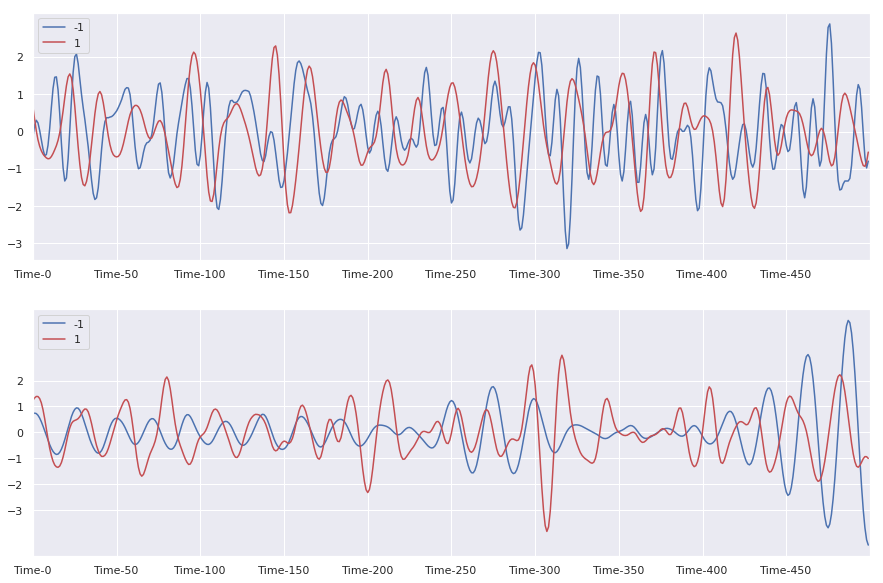

In [207]:
#Plot values of dataset with Target 1 andd -1 and check relationshipp to one another
plt.figure(figsize=[15,10])
plt.subplot(211)
plt.plot(train.loc[0, 'Time-0':], c='b', label='-1', linestyle='-')
plt.plot(train.loc[5, 'Time-0':], c='r', label='1', )
plt.legend()
plt.xlim(0,500)
plt.xticks(range(0,500,50))
plt.yticks(range(-3,3,1))
plt.subplot(212)
plt.plot(train.loc[2, 'Time-0':], c='b', label='-1', linestyle='-')
plt.plot(train.loc[3, 'Time-0':], c='r', label='1', )
plt.legend()
plt.xlim(0,500)
plt.xticks(range(0,500,50))
plt.yticks(range(-3,3,1))

#at first glance looks almost the same but notice that target -1 has a somewhat hight absolute value than -1. also seems to have more turns

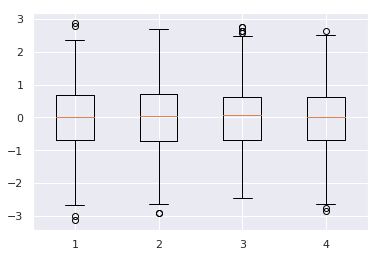

In [208]:
#Checking Boxplot for mean, meadian, etc
#Box plot all looked similar with no way to easily determine the relationship.
p1 = train.loc[0, "Time-0": ]
p2 = train.loc[1, "Time-0": ]
n1 = train.loc[8, "Time-0": ]
n2 = train.loc[9, "Time-0": ]
fig, ax = plt.subplots()
ax.boxplot([p1, p2,n1,n2])
plt.show()
#position 0&1 for T=-1 and 8&9  T=1. 
#So meandian also the same near zero and quartile distribution looks similar 
#maximum of -1 looks a little bit higher

### Propose several features 

In [209]:
# 1. MEAN let's look at the mean
mean_t = train.groupby(by='Target').mean()
mean_t

,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,Time-9,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
Target,,,,,,,,,,,,,,,,,,,,,
-1,0.057578,0.050947,0.037003,0.017715,-0.003280,-0.022263,-0.037115,-0.044112,-0.042787,-0.037302,...,0.018193,0.020474,0.015818,0.006062,-0.005288,-0.015752,-0.022897,-0.025660,-0.025613,-0.023231
1,0.054322,0.048807,0.040886,0.030842,0.018868,0.005302,-0.008981,-0.022347,-0.033974,-0.043031,...,-0.063421,-0.064323,-0.060269,-0.053226,-0.044079,-0.034087,-0.023680,-0.012305,0.000637,0.015415


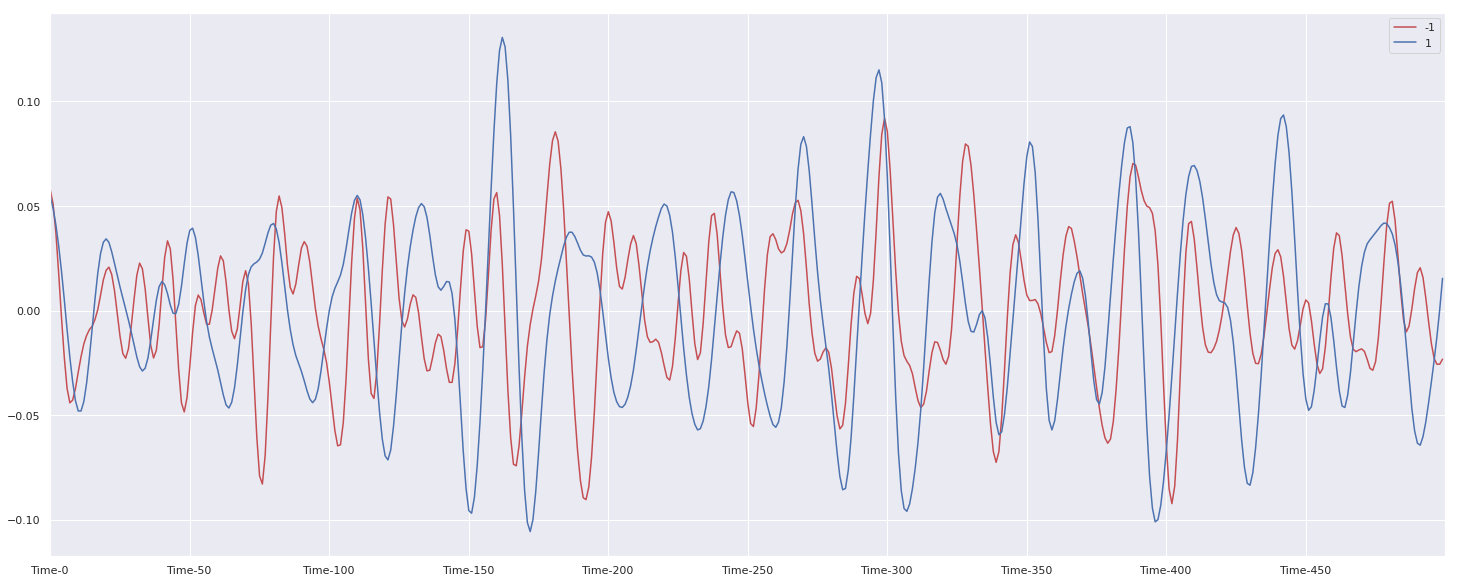

In [210]:
plt.figure(figsize=[25,10])
plt.plot(mean_t.loc[-1,:], c='r', label='-1')
plt.plot(mean_t.loc[1, :], c='b', label='1')

plt.legend()
plt.xlim(0,500)
plt.xticks(range(0,500,50));
#not very good feature except mean of 1 bit higher

In [211]:
#Analysing ssquare of mean, sum of series, different between max and minimum also looked not too good for classification

In [212]:
#2. NUMBER OF VLUE REPETITIONS
#Analyse for new feature which is the number of times a certain value appears in a set. The total time-set is 500 if no repeated values should return unique values for all 500
new_train = train.T.iloc[1:]
new_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319
Time-0,-0.140400,0.33404,0.71669,1.2403,-1.15950,0.659020,-0.35704,0.012008,-1.06430,-1.19670,...,-0.14785,0.74842,0.82902,0.316570,0.28708,0.14363,-0.16557,0.71008,0.006847,-0.54136
Time-1,0.171640,0.32225,0.74437,1.3312,-1.20420,0.325790,-0.34950,0.759680,-1.10270,-0.93059,...,0.13652,1.21460,0.63324,0.132040,0.28042,-0.13582,-0.50461,0.59398,-0.140620,-0.24172
Time-2,0.302040,0.45384,0.72591,1.3866,-1.16760,0.019658,-0.47871,1.301100,-1.09580,-0.60855,...,0.34083,1.60660,0.39586,-0.035363,0.24263,-0.51028,-0.78007,0.38189,-0.270590,0.10074
Time-3,0.232800,0.67185,0.66133,1.3832,-1.03350,-0.221440,-0.67790,1.564400,-1.05370,-0.23722,...,0.48090,1.91600,0.13554,-0.184880,0.18128,-0.85080,-0.93704,0.12729,-0.378830,0.46895
Time-4,0.033853,0.88790,0.55522,1.3060,-0.81817,-0.393310,-0.88463,1.511800,-0.96171,0.17714,...,0.57149,2.14290,-0.12622,-0.311770,0.11351,-1.05810,-0.95052,-0.11230,-0.461980,0.83063


In [213]:
#Checking the first set to see if there is any repetition of values
print('Total number of values for this is', len(new_train.iloc[::, 0]))
print('Total unique values for this is' , len(new_train.iloc[::, 0].unique()))
#Apparently some values are repeated

Total number of values for this is 500
Total unique values for this is 443


In [214]:
#Confirming if  repetition of values really affect what target it will be by taking 3 values from table when target is -1 and confirming uniqueness
print('Total number of values is', len(new_train.iloc[::, 0]), len(new_train.iloc[::, 4]), len(new_train.iloc[::, 7]))
print('Total unique values is' , len(new_train.iloc[::, 0].unique()), len(new_train.iloc[::, 4].unique()), len(new_train.iloc[::, 7].unique()))
print('large difference of -1')
#here in target -1 apparently many repetitions on the order of 50 values

Total number of values is 500 500 500
Total unique values is 443 423 438
large difference of -1


In [215]:
#checking same for Target +1
print('Total number of values is', len(new_train.iloc[::, 3]), len(new_train.iloc[::, 5]), len(new_train.iloc[::, 9]))
print('Total unique values is' , len(new_train.iloc[::, 3].unique()), len(new_train.iloc[::, 5].unique()), len(new_train.iloc[::, 9].unique()))
print('small difference suggests Target to be of +1')
#looks good to me - i think we might have something here
#But need to confirm that with the whole train data and not just 3 samples

Total number of values is 500 500 500
Total unique values is 500 496 500
small difference suggests Target to be of +1


In [216]:
#now divide original train dataset into two and groupby Target
positive_train = train[train.Target==1]
negative_train = train[train.Target==-1]
print('shape of positive train', positive_train.shape)
print('shape of negative train', negative_train.shape)
positive_train = positive_train.reset_index(drop=True)
negative_train = negative_train.reset_index(drop=True)
negative_train.head()

shape of positive train (639, 501)
shape of negative train (681, 501)


,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-1,-0.14040,0.17164,0.30204,0.23280,0.033853,-0.22418,-0.46999,-0.645400,-0.61770,...,-0.31997,0.39090,0.97483,1.258700,1.14330,0.647090,-0.049582,-0.690400,-0.97660,-0.79426
1,-1,0.33404,0.32225,0.45384,0.67185,0.887900,1.02050,1.05980,1.030300,0.95075,...,0.43519,-0.34650,-0.92491,-1.208700,-1.24800,-1.140000,-1.041800,-1.041800,-1.15960,-1.37570
2,-1,0.71669,0.74437,0.72591,0.66133,0.555220,0.41359,0.24658,0.065273,-0.12111,...,3.17100,2.27600,1.21950,0.081881,-1.05030,-2.092900,-2.983300,-3.675300,-4.13660,-4.33960
3,-1,-1.15950,-1.20420,-1.16760,-1.03350,-0.818170,-0.55812,-0.29929,-0.093691,0.02277,...,0.66085,0.44144,0.20618,-0.006941,-0.14692,-0.183080,-0.112380,0.008987,0.13141,0.18627
4,-1,-0.35704,-0.34950,-0.47871,-0.67790,-0.884630,-1.00200,-0.98154,-0.741430,-0.25690,...,0.25993,0.41821,0.40421,0.305150,0.15980,0.082486,0.122110,0.219020,0.26962,0.19748


(-5, 220)

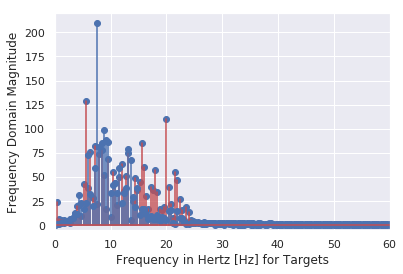

<Figure size 1800x720 with 0 Axes>

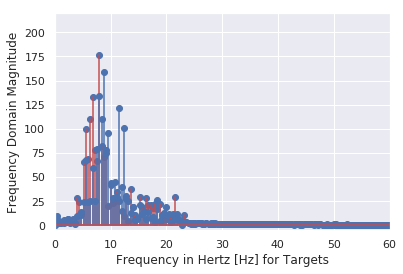

In [217]:
# 3. FOURIER TRANSFORMS
#try to check how frequency changes based on the target
from scipy import fftpack
X_train = train.drop('Target', axis = 1)
f_s = 200
#for Target -1
first = fftpack.fft(X_train.iloc[0])
second =  fftpack.fft(X_train.iloc[4])
#for Target 1
third = fftpack.fft(X_train.iloc[3])
fourth = fftpack.fft(X_train.iloc[5])

first_freq =  fftpack.fftfreq(len(X_train.iloc[0]))*f_s
second_freq =  fftpack.fftfreq(len(X_train.iloc[4]))*f_s
third_freq =  fftpack.fftfreq(len(X_train.iloc[3]))*f_s
fourth_freq =  fftpack.fftfreq(len(X_train.iloc[5]))*f_s

fig, ax = plt.subplots()
plt.figure(figsize=[25,10])
ax.stem(first_freq, np.abs(first), 'r', label="1")
ax.stem(second_freq, np.abs(third), 'b', label="-1")
plt.legend
ax.set_xlabel('Frequency in Hertz [Hz] for Targets')
ax.set_ylabel('Frequency Domain Magnitude')
ax.set_xlim(0, 60)  
ax.set_ylim(-5, 220)

fig, ax = plt.subplots()
ax.stem(third_freq, np.abs(second), 'r', label="1")
ax.stem(fourth_freq, np.abs(fourth), 'b', label="-1")
plt.legend
ax.set_xlabel('Frequency in Hertz [Hz] for Targets')
ax.set_ylabel('Frequency Domain Magnitude')
ax.set_xlim(0, 60)  
ax.set_ylim(-5, 220)


In [218]:
#the frequency graph practically overlabs except for some outliers. cant identify possible relationship

### 4. Calculate proposed feature and vizualise

In [219]:
positive_target = positive_train.drop(['Target'],axis=1)
negative_target = negative_train.drop(['Target'],axis=1)


In [220]:
#Now we make table of unique values in each Target and plot
unique_positive_values = [] 
unique_negative_values = []
for i in range(0,681):
    u = len(pd.unique(negative_target.iloc[i]))
    unique_negative_values.append(u)
for i in range(0,639):
    v = len(pd.unique(positive_target.iloc[i]))
    unique_positive_values.append(v)

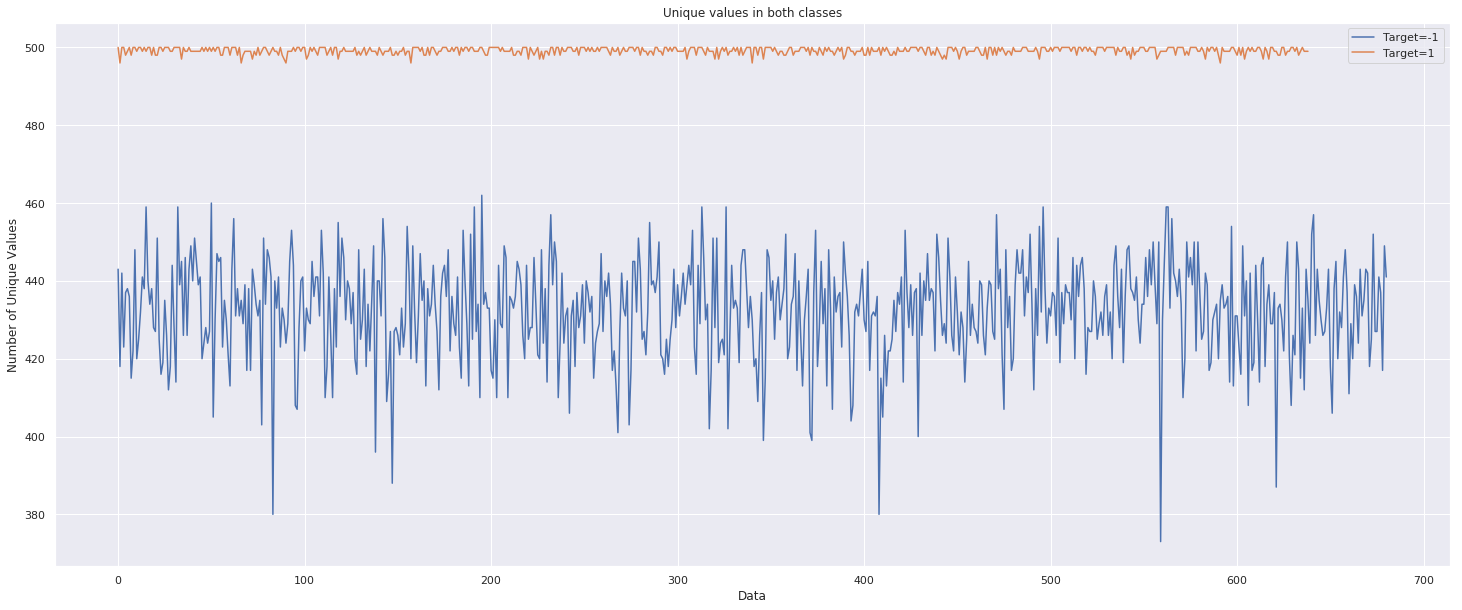

In [221]:
#Now we print the unique value in each class
x = np.arange(0,681)
x2 = np.arange(0,639)
y = unique_negative_values
z = unique_positive_values
plt.figure(figsize=[25,10])
plt.plot(x,y, label="Target=-1")
plt.plot(x2,z, label='Target=1')
plt.xlabel("Data")
plt.ylabel("Number of Unique Values")
plt.title("Unique values in both classes")
plt.legend()
plt.show()
#obviously easily seen that the proposed features works well for dataset 


### Propose decision rule and verify with test data

In [222]:
#divide test data by separating target to y 
X_test = test.drop(["Target"], axis=1)
y = test.Target
y.head()

0   -1
1    1
2   -1
3   -1
4   -1
Name: Target, dtype: int64

In [223]:
test.shape[0]

3601

In [224]:
X_test.head()

,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,Time-9,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-0.79717,-0.664390,-0.37301,0.040815,0.52694,0.98429,1.3531,1.5781,1.6593,1.6408,...,1.12080,0.722420,0.36207,0.092083,-0.081268,-0.21257,-0.39146,-0.66439,-1.073800,-1.56430
1,0.80485,0.634630,0.37347,0.038343,-0.34099,-0.74086,-1.1097,-1.3954,-1.5702,-1.6200,...,0.38640,0.049213,-0.25814,-0.510580,-0.683650,-0.77382,-0.78525,-0.71489,-0.560440,-0.31909
2,0.72799,0.111280,-0.49912,-1.068600,-1.57840,-1.99050,-2.3020,-2.5034,-2.5852,-2.5506,...,0.39446,0.463680,0.50773,0.517170,0.504590,0.47627,0.43851,0.39446,0.339400,0.25539
3,-0.23444,-0.502160,-0.73249,-0.946130,-1.13970,-1.32330,-1.4902,-1.6071,-1.6204,-1.5069,...,-0.95280,-0.929440,-0.92276,-0.929440,-0.909410,-0.83597,-0.69577,-0.47879,-0.188710,0.11974
4,-0.17133,-0.062285,0.23583,0.710400,1.24000,1.64980,1.8763,1.8655,1.7038,1.4665,...,0.77619,0.725500,0.69745,0.731970,0.808540,0.83982,0.73305,0.43752,-0.026585,-0.60221


In [225]:
print(len(pd.unique(X_test.iloc[0])))

429


In [226]:
#iterate through the rows and if the uniqness is less than 480 then sort 
y_pred_list = []
for rows in range(0, test.shape[0]):
    if len(pd.unique(X_test.iloc[rows])) < 480:
        y_pred_list.append(-1)
    else:
        y_pred_list.append(1)
#y_pred

In [227]:
#make datafram from the list
y_pred = pd.DataFrame(y_pred_list)
y_pred.head()

,0
0,-1
1,1
2,-1
3,-1
4,-1


In [228]:
#check accuracy with accuracy_score
from sklearn.metrics import accuracy_score
print('Feature accuracy is',)
accuracy_score(y, y_pred,normalize=True)

Feature accuracy is


1.0